# Wine Quality Dataset

* [Presentation (slide-deck)](https://github.com/zunicd/Wine-Classification/blob/master/Wine%20Classification.pdf)



**Source:**

UCI Machine Learning Repository - https://archive.ics.uci.edu/ml/datasets/Wine+Quality

**Data sets:** 
- winequality-red.csv	, 1599 x 12	
- winequality-white.csv, 4898 x 12


###  Description of attributes:
    
1. **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- **citric acid:** found in small quantities, citric acid can add 'freshness' and flavor to wines
- **residual sugar:** the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- **chlorides:** the amount of salt in the wine
- **free sulfur dioxide:** the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- **total sulfur dioxide:** amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- **density:** the density of water is close to that of water depending on the percent alcohol and sugar content
- **pH:** describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- **sulphates:** a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- **alcohol:** the percent alcohol content of the wine
- **quality** (score between 0 and 10): `Output variable (based on sensory data)`



## Import Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style='whitegrid')
%matplotlib inline

## The Data

In [2]:
# load both data sets
# the files are using semicolons as separators
data_rw = pd.read_csv('./Wine_Data/winequality-red.csv', sep=';')
data_ww = pd.read_csv('./Wine_Data/winequality-white.csv', sep=';')

In [3]:
data_rw.shape

(1599, 12)

In [4]:
data_ww.shape

(4898, 12)

In [5]:
data_rw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
data_rw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data_ww.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
data_ww.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### Checking for nulls

In [9]:
data_ww.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [10]:
data_rw.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

## Prepare the Data (new columns and merge dataframes)

Add the column ``"type"`` (red or white) to both dataframes

In [11]:
data_rw.insert(0, 'type', 'red')
data_ww.insert(0, 'type', 'white')

In [12]:
data_rw.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        5  
3       0.58      9.8        6  
4       0.56      9.4        5

In [13]:
data_ww.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

Merge red and white wine dataframes to one dataframe.

In [14]:
wines = data_rw.append(data_ww, ignore_index=True)

In [15]:
wines.shape

(6497, 13)

In [16]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


Group the records into three buckets based on the quality ratings and create the column ``"quality class"`` 
- **low** for quality <= 5
- **medium** for quality 6 and 7
- **high** for quality > 7


In [17]:
wines['quality class'] = wines.quality.apply(lambda q: 'low' if q <= 5 \
                                             else 'high' if q > 7 else 'medium')

In [18]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality quality class  
0       0.56      9.4        5           low  
1       0.68      9.8        5           low  
2       0.65      9.8        5           low  
3       0.58      9.8        6        medium  
4       0.56      9.4        5           low

In [19]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality class           6497 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 710.7+ KB


In [20]:
wines.apply(lambda c: [c.unique()])

type                                                       [[red, white]]
fixed acidity           [[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9...
volatile acidity        [[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58...
citric acid             [[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.2...
residual sugar          [[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8,...
chlorides               [[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0....
free sulfur dioxide     [[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52....
total sulfur dioxide    [[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18...
density                 [[0.9978, 0.9968, 0.997, 0.998, 0.9964, 0.9946...
pH                      [[3.51, 3.2, 3.26, 3.16, 3.3, 3.39, 3.36, 3.35...
sulphates               [[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0....
alcohol                 [[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9....
quality                                           [[5, 6, 7, 4, 8, 3, 9]]
quality class                         

In [21]:
wines.apply(lambda c: c.unique().shape[0])

type                      2
fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
quality class             3
dtype: int64

In [22]:
wines.dtypes.value_counts()

float64    11
object      2
int64       1
dtype: int64

In [23]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

**Save the dataframe to the csv file for future use:**

In [24]:
wines.to_csv('./Wine_data/winesdz.csv', index=False)

### Descriptive Statistics by Type of the Wine


In [25]:
wines.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'quality class'],
      dtype='object')

In [26]:
round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T

count   mean    std   min    25%    50%    75%     max
fixed acidity         1599.0   8.32   1.74  4.60   7.10   7.90   9.20   15.90
volatile acidity      1599.0   0.53   0.18  0.12   0.39   0.52   0.64    1.58
citric acid           1599.0   0.27   0.19  0.00   0.09   0.26   0.42    1.00
residual sugar        1599.0   2.54   1.41  0.90   1.90   2.20   2.60   15.50
chlorides             1599.0   0.09   0.05  0.01   0.07   0.08   0.09    0.61
free sulfur dioxide   1599.0  15.87  10.46  1.00   7.00  14.00  21.00   72.00
total sulfur dioxide  1599.0  46.47  32.90  6.00  22.00  38.00  62.00  289.00
density               1599.0   1.00   0.00  0.99   1.00   1.00   1.00    1.00
pH                    1599.0   3.31   0.15  2.74   3.21   3.31   3.40    4.01
sulphates             1599.0   0.66   0.17  0.33   0.55   0.62   0.73    2.00
alcohol               1599.0  10.42   1.07  8.40   9.50  10.20  11.10   14.90
quality               1599.0   5.64   0.81  3.00   5.00   6.00   6.00    8.00

In [27]:
round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

count    mean    std   min     25%     50%     75%  \
fixed acidity         4898.0    6.85   0.84  3.80    6.30    6.80    7.30   
volatile acidity      4898.0    0.28   0.10  0.08    0.21    0.26    0.32   
citric acid           4898.0    0.33   0.12  0.00    0.27    0.32    0.39   
residual sugar        4898.0    6.39   5.07  0.60    1.70    5.20    9.90   
chlorides             4898.0    0.05   0.02  0.01    0.04    0.04    0.05   
free sulfur dioxide   4898.0   35.31  17.01  2.00   23.00   34.00   46.00   
total sulfur dioxide  4898.0  138.36  42.50  9.00  108.00  134.00  167.00   
density               4898.0    0.99   0.00  0.99    0.99    0.99    1.00   
pH                    4898.0    3.19   0.15  2.72    3.09    3.18    3.28   
sulphates             4898.0    0.49   0.11  0.22    0.41    0.47    0.55   
alcohol               4898.0   10.51   1.23  8.00    9.50   10.40   11.40   
quality               4898.0    5.88   0.89  3.00    5.00    6.00    6.00   

                         max  
fixed acidity          14.20  
volatile acidity        1.10  
citric acid             1.66  
residual sugar         65.80  
chlorides               0.35  
free sulfur dioxide   289.00  
total sulfur dioxide  440.00  
density                 1.04  
pH                      3.82  
sulphates               1.08  
alcohol                14.20  
quality                 9.00

In [28]:
# create descriptive statistics dataframes for each type of wine
rws = round(wines.loc[wines.type == 'red', wines.columns].describe(),2).T
wws = round(wines.loc[wines.type == 'white', wines.columns].describe(),2).T

In [29]:
# concatenate those two dataframes
pd.concat([rws, wws], axis=1, keys=['Red Wine', 'White Wine'])

Red Wine                                           \
                        count   mean    std   min    25%    50%    75%   
fixed acidity          1599.0   8.32   1.74  4.60   7.10   7.90   9.20   
volatile acidity       1599.0   0.53   0.18  0.12   0.39   0.52   0.64   
citric acid            1599.0   0.27   0.19  0.00   0.09   0.26   0.42   
residual sugar         1599.0   2.54   1.41  0.90   1.90   2.20   2.60   
chlorides              1599.0   0.09   0.05  0.01   0.07   0.08   0.09   
free sulfur dioxide    1599.0  15.87  10.46  1.00   7.00  14.00  21.00   
total sulfur dioxide   1599.0  46.47  32.90  6.00  22.00  38.00  62.00   
density                1599.0   1.00   0.00  0.99   1.00   1.00   1.00   
pH                     1599.0   3.31   0.15  2.74   3.21   3.31   3.40   
sulphates              1599.0   0.66   0.17  0.33   0.55   0.62   0.73   
alcohol                1599.0  10.42   1.07  8.40   9.50  10.20  11.10   
quality                1599.0   5.64   0.81  3.00   5.00   6.00   6.00   

                             White Wine                                       \
                         max      count    mean    std   min     25%     50%   
fixed acidity          15.90     4898.0    6.85   0.84  3.80    6.30    6.80   
volatile acidity        1.58     4898.0    0.28   0.10  0.08    0.21    0.26   
citric acid             1.00     4898.0    0.33   0.12  0.00    0.27    0.32   
residual sugar         15.50     4898.0    6.39   5.07  0.60    1.70    5.20   
chlorides               0.61     4898.0    0.05   0.02  0.01    0.04    0.04   
free sulfur dioxide    72.00     4898.0   35.31  17.01  2.00   23.00   34.00   
total sulfur dioxide  289.00     4898.0  138.36  42.50  9.00  108.00  134.00   
density                 1.00     4898.0    0.99   0.00  0.99    0.99    0.99   
pH                      4.01     4898.0    3.19   0.15  2.72    3.09    3.18   
sulphates               2.00     4898.0    0.49   0.11  0.22    0.41    0.47   
alcohol                14.90     4898.0   10.51   1.23  8.00    9.50   10.40   
quality                 8.00     4898.0    5.88   0.89  3.00    5.00    6.00   

                                      
                         75%     max  
fixed acidity           7.30   14.20  
volatile acidity        0.32    1.10  
citric acid             0.39    1.66  
residual sugar          9.90   65.80  
chlorides               0.05    0.35  
free sulfur dioxide    46.00  289.00  
total sulfur dioxide  167.00  440.00  
density                 1.00    1.04  
pH                      3.28    3.82  
sulphates               0.55    1.08  
alcohol                11.40   14.20  
quality                 6.00    9.00

The highlights from descriptive statistic of wine types:
- Mean total sulfur dioxide and residual sugar content seems to be much higher in white wines that in red wines 
- Citric acid is more present in white wines, while fixed acidity, volatile acidity and sulphates are more present in red wine
- Red wines have double concentration of chlorides then white wines


### Descriptive Statistics by Quality of the Wine

In [30]:
# create descriptive statistics dataframes for each quality bucket
lqs = round(wines.loc[wines['quality class'] == 'low', wines.columns].describe(),2).T
mqs = round(wines.loc[wines['quality class'] == 'medium', wines.columns].describe(),2).T
hqs = round(wines.loc[wines['quality class'] == 'high', wines.columns].describe(),2).T

In [31]:
# concatenate those three dataframes
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Wine', 'Medium Quality Wine', 'High Quality Wine'])

Low Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed acidity                  2384.0    7.33   1.27  4.20   6.50    7.10   
volatile acidity               2384.0    0.40   0.19  0.10   0.26    0.34   
citric acid                    2384.0    0.30   0.16  0.00   0.21    0.30   
residual sugar                 2384.0    5.65   4.92  0.60   1.80    2.90   
chlorides                      2384.0    0.06   0.04  0.01   0.04    0.05   
free sulfur dioxide            2384.0   29.48  19.84  2.00  14.00   26.00   
total sulfur dioxide           2384.0  119.28  61.89  6.00  68.00  124.00   
density                        2384.0    1.00   0.00  0.99   0.99    1.00   
pH                             2384.0    3.21   0.16  2.74   3.11    3.20   
sulphates                      2384.0    0.52   0.14  0.25   0.44    0.50   
alcohol                        2384.0    9.87   0.84  8.00   9.30    9.60   
quality                        2384.0    4.88   0.36  3.00   5.00    5.00   

                                     Medium Quality Wine           ...    \
                         75%     max               count    mean   ...     
fixed acidity           7.80   15.90              3915.0    7.16   ...     
volatile acidity        0.50    1.58              3915.0    0.31   ...     
citric acid             0.40    1.00              3915.0    0.33   ...     
residual sugar          8.52   23.50              3915.0    5.32   ...     
chlorides               0.08    0.61              3915.0    0.05   ...     
free sulfur dioxide    42.00  289.00              3915.0   30.96   ...     
total sulfur dioxide  167.00  440.00              3915.0  113.51   ...     
density                 1.00    1.00              3915.0    0.99   ...     
pH                      3.31    3.90              3915.0    3.22   ...     
sulphates               0.58    2.00              3915.0    0.54   ...     
alcohol                10.40   14.90              3915.0   10.81   ...     
quality                 5.00    5.00              3915.0    6.28   ...     

                                     High Quality Wine                        \
                         75%     max             count    mean    std    min   
fixed acidity           7.60   15.60             198.0    6.85   1.14   3.90   
volatile acidity        0.36    1.04             198.0    0.29   0.12   0.12   
citric acid             0.39    1.66             198.0    0.33   0.10   0.03   
residual sugar          7.90   65.80             198.0    5.35   4.16   0.80   
chlorides               0.06    0.42             198.0    0.04   0.02   0.01   
free sulfur dioxide    41.00  112.00             198.0   34.51  17.08   3.00   
total sulfur dioxide  150.00  294.00             198.0  117.48  41.69  12.00   
density                 1.00    1.04             198.0    0.99   0.00   0.99   
pH                      3.33    4.01             198.0    3.23   0.16   2.88   
sulphates               0.61    1.95             198.0    0.51   0.16   0.25   
alcohol                11.70   14.20             198.0   11.69   1.27   8.50   
quality                 7.00    7.00             198.0    8.03   0.16   8.00   

                                                     
                        25%     50%     75%     max  
fixed acidity          6.20    6.80    7.30   12.60  
volatile acidity       0.21    0.28    0.35    0.85  
citric acid            0.28    0.32    0.37    0.74  
residual sugar         2.00    4.05    7.57   14.80  
chlorides              0.03    0.04    0.04    0.12  
free sulfur dioxide   24.00   34.00   43.00  105.00  
total sulfur dioxide  96.00  118.50  145.00  212.50  
density                0.99    0.99    0.99    1.00  
pH                     3.13    3.23    3.33    3.72  
sulphates              0.38    0.48    0.60    1.10  
alcohol               11.00   12.00   12.60   14.00  
quality                8.00    8.00    8.00    9.00  


**Transpose it back to see all data in the notebook**

In [32]:
pd.concat([lqs, mqs, hqs], axis=1, keys=['Low Quality Winw', 'Medium Quality Wine', 'High Quality Wine']).T

fixed acidity  volatile acidity  citric acid  \
Low Quality Winw    count        2384.00           2384.00      2384.00   
                    mean            7.33              0.40         0.30   
                    std             1.27              0.19         0.16   
                    min             4.20              0.10         0.00   
                    25%             6.50              0.26         0.21   
                    50%             7.10              0.34         0.30   
                    75%             7.80              0.50         0.40   
                    max            15.90              1.58         1.00   
Medium Quality Wine count        3915.00           3915.00      3915.00   
                    mean            7.16              0.31         0.33   
                    std             1.31              0.14         0.13   
                    min             3.80              0.08         0.00   
                    25%             6.40              0.21         0.26   
                    50%             6.90              0.27         0.31   
                    75%             7.60              0.36         0.39   
                    max            15.60              1.04         1.66   
High Quality Wine   count         198.00            198.00       198.00   
                    mean            6.85              0.29         0.33   
                    std             1.14              0.12         0.10   
                    min             3.90              0.12         0.03   
                    25%             6.20              0.21         0.28   
                    50%             6.80              0.28         0.32   
                    75%             7.30              0.35         0.37   
                    max            12.60              0.85         0.74   

                           residual sugar  chlorides  free sulfur dioxide  \
Low Quality Winw    count         2384.00    2384.00              2384.00   
                    mean             5.65       0.06                29.48   
                    std              4.92       0.04                19.84   
                    min              0.60       0.01                 2.00   
                    25%              1.80       0.04                14.00   
                    50%              2.90       0.05                26.00   
                    75%              8.52       0.08                42.00   
                    max             23.50       0.61               289.00   
Medium Quality Wine count         3915.00    3915.00              3915.00   
                    mean             5.32       0.05                30.96   
                    std              4.68       0.03                16.33   
                    min              0.70       0.01                 1.00   
                    25%              1.80       0.04                19.00   
                    50%              3.00       0.04                29.00   
                    75%              7.90       0.06                41.00   
                    max             65.80       0.42               112.00   
High Quality Wine   count          198.00     198.00               198.00   
                    mean             5.35       0.04                34.51   
                    std              4.16       0.02                17.08   
                    min              0.80       0.01                 3.00   
                    25%              2.00       0.03                24.00   
                    50%              4.05       0.04                34.00   
                    75%              7.57       0.04                43.00   
                    max             14.80       0.12               105.00   

                           total sulfur dioxide  density       pH  sulphates  \
Low Quality Winw    count               2384.00  2384.00  2384.00    2384.00   
                    mean                 119.28     1.00     3.21

The highlights from descriptive statistics of wine quality classes:
- Alcohol concentration increases with quality of wines.
- Higher quality wines have less volatile acidity and the chlorides.
- Fixed acidity is lower with higher quality wines. 
- The free sulfur dioxide is higher with high quality wines.


## Exploratory Data Analysis 

**Distributions of wines per type and quality ratings**

(0, 2300)

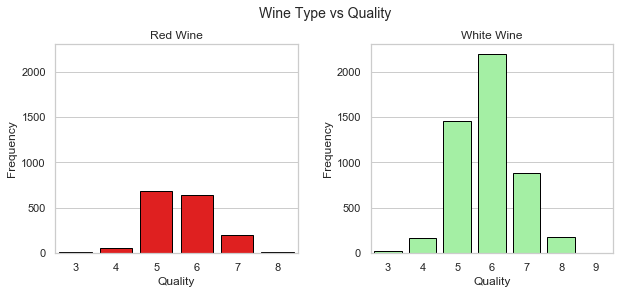

In [33]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Type vs Quality', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality',
              data=wines[wines.type == 'red'],
              color='red',
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 2300])

sns.countplot(x='quality',
              data=wines[wines.type == 'white'],
              color='palegreen',
              edgecolor='black',
              ax=ax2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ax2.set_ylim([0, 2300])


- Distributions of the data by wine types and quality ratings are shown above.
- We can see that they are normally distributed. Most of the wines are rated 5 to 7, while very few wines are rated “very good” (8 – 9) and “very poor” (3 – 4).


**Distributions of wines per type and quality classes**

(0, 3200)

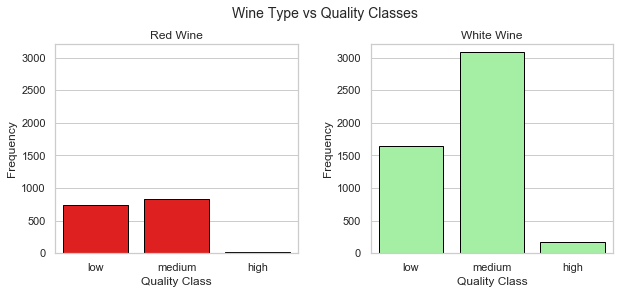

In [34]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
f.suptitle('Wine Type vs Quality Classes', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

sns.countplot(x='quality class',
              data=wines[wines.type == 'red'],
              color='red',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax1)
ax1.set_title('Red Wine')
ax1.set_xlabel('Quality Class')
ax1.set_ylabel('Frequency',size=12)
ax1.set_ylim([0, 3200])

sns.countplot(x='quality class',
              data=wines[wines.type == 'white'],
              color='palegreen',
              order=['low','medium','high'],
              edgecolor='black',
              ax=ax2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality Class")
ax2.set_ylabel("Frequency",size=12) 
ax2.set_ylim([0, 3200])


- Distributions of the data by wine types and quality classes are shown above.
- It confirms the imbalance between classes, especially with few cases in high quality.


### Preparing the dataframe and the type and quality class target variables

In [35]:
# to randomize data points we should re-shuffle records 
wines = wines.sample(frac=1, random_state=77).reset_index(drop=True)

**Convert Pandas Categorical Data For Scikit-Learn**

**LabelEncoder** can be used to normalize labels.
Let's use it to transform non-numerical labels to numerical labels.
In our case types of wines in the column "type".

In [36]:
# create a label (category) encoder object
le = LabelEncoder()

# fit the encoder to dataframe column and return encoded labels (transferred to integers)
y_type = le.fit_transform(wines.type.values) # 0 - Red ; 1 - White

# add a new column "color" with normalized labels
# it will be used later as the wine type target variable (1st research question)
wines['color'] = y_type

In [37]:
type(y_type)

numpy.ndarray

In [38]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.36         0.32            1.80   
1  white            8.3              0.20         0.74            4.45   
2  white            7.2              0.16         0.32            0.80   
3    red            6.6              0.58         0.00            2.20   
4  white            6.2              0.35         0.31            2.60   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.067                  4.0                   8.0  0.99280  3.36   
1      0.044                 33.0                 130.0  0.99240  3.25   
2      0.040                 50.0                 121.0  0.99220  3.27   
3      0.100                 50.0                  63.0  0.99544  3.59   
4      0.036                 37.0                  92.0  0.98938  3.27   

   sulphates  alcohol  quality quality class  color  
0       0.55     12.8        7        medium      0  
1       0.42     12.2        6        medium      1  
2       0.33     10.0        6        medium      1  
3       0.68     11.4        6        medium      0  
4       0.53     12.8        7        medium      1

In [39]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
quality class           6497 non-null object
color                   6497 non-null int32
dtypes: float64(11), int32(1), int64(1), object(2)
memory usage: 736.1+ KB


In [40]:
wines.color.unique()

array([0, 1], dtype=int64)

**Preparing the target variable for the 2nd research question (predicting the quality class)**

In [41]:
# convert non-numeric quality class labels to numeric labels
# according to the dictionary's mapping
qcl = {'low':0, 'medium': 1, 'high': 2}
y_qclass = wines['quality class'].map(qcl)

In [42]:
y_qclass.head()

0    1
1    1
2    1
3    1
4    1
Name: quality class, dtype: int64

In [43]:
type(y_qclass)

pandas.core.series.Series

In [44]:
y_qclass.unique()

array([1, 0, 2], dtype=int64)

**Checking correlations based on the type of wines (red or white)**

In [45]:
wcorr = wines.corr()

In [46]:
# sort features in order of their correllation with type of wines (column "color")
sort_corr_cols = wcorr.color.sort_values(ascending=False).keys()
sort_corr_t = wcorr.loc[sort_corr_cols,sort_corr_cols]
sort_corr_t

color  total sulfur dioxide  free sulfur dioxide  \
color                 1.000000              0.700357             0.471644   
total sulfur dioxide  0.700357              1.000000             0.720934   
free sulfur dioxide   0.471644              0.720934             1.000000   
residual sugar        0.348821              0.495482             0.402871   
citric acid           0.187397              0.195242             0.133126   
quality               0.119323             -0.041385             0.055463   
alcohol               0.032970             -0.265740            -0.179838   
pH                   -0.329129             -0.238413            -0.145854   
density              -0.390645              0.032395             0.025717   
fixed acidity        -0.486740             -0.329054            -0.282735   
sulphates            -0.487218             -0.275727            -0.188457   
chlorides            -0.512678             -0.279630            -0.195045   
volatile acidity     -0.653036             -0.414476            -0.352557   

                      residual sugar  citric acid   quality   alcohol  \
color                       0.348821     0.187397  0.119323  0.032970   
total sulfur dioxide        0.495482     0.195242 -0.041385 -0.265740   
free sulfur dioxide         0.402871     0.133126  0.055463 -0.179838   
residual sugar              1.000000     0.142451 -0.036980 -0.359415   
citric acid                 0.142451     1.000000  0.085532 -0.010493   
quality                    -0.036980     0.085532  1.000000  0.444319   
alcohol                    -0.359415    -0.010493  0.444319  1.000000   
pH                         -0.267320    -0.329808  0.019506  0.121248   
density                     0.552517     0.096154 -0.305858 -0.686745   
fixed acidity              -0.111981     0.324436 -0.076743 -0.095452   
sulphates                  -0.185927     0.056197  0.038485 -0.003029   
chlorides                  -0.128940     0.038998 -0.200666 -0.256916   
volatile acidity           -0.196011    -0.377981 -0.265699 -0.037640   

                            pH   density  fixed acidity  sulphates  chlorides  \
color                -0.329129 -0.390645      -0.486740  -0.487218  -0.512678   
total sulfur dioxide -0.238413  0.032395      -0.329054  -0.275727  -0.279630   
free sulfur dioxide  -0.145854  0.025717      -0.282735  -0.188457  -0.195045   
residual sugar       -0.267320  0.552517      -0.111981  -0.185927  -0.128940   
citric acid          -0.329808  0.096154       0.324436   0.056197   0.038998   
quality               0.019506 -0.305858      -0.076743   0.038485  -0.200666   
alcohol               0.121248 -0.686745      -0.095452  -0.003029  -0.256916   
pH                    1.000000  0.011686      -0.252700   0.192123   0.044708   
density               0.011686  1.000000       0.458910   0.259478   0.362615   
fixed acidity        -0.252700  0.458910       1.000000   0.299568   0.298195   
sulphates             0.192123  0.259478       0.299568   1.000000   0.395593   
chlorides             0.044708  0.362615       0.298195   0.395593   1.000000   
volatile acidity      0.261454  0.271296       0.219008   0.225984   0.377124   

                      volatile acidity  
color                        -0.653036  
total sulfur dioxide         -0.414476  
free sulfur dioxide          -0.352557  
residual sugar               -0.196011  
citric acid                  -0.377981  
quality                      -0.265699  
alcohol                      -0.037640  
pH                            0.261454  
density                       0.271296  
fixed acidity                 0.219008  
sulphates                     0.225984  
chlorides                     0.377124  
volatile acidity              1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text yticklabel objects>)

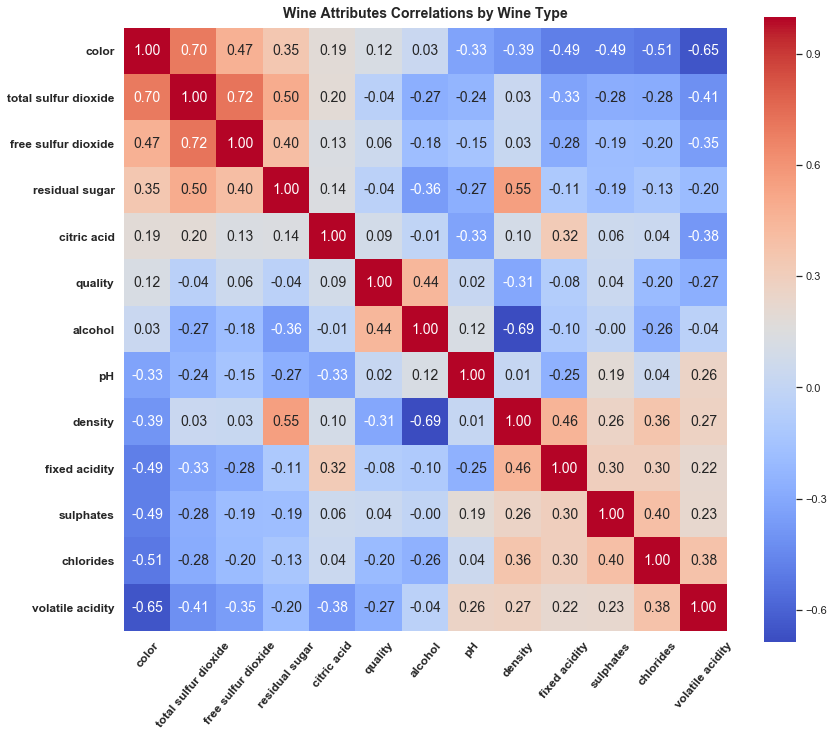

In [47]:
# heatmap plot for correlations
plt.figure(figsize=(13.5,11.5))
sns.heatmap(sort_corr_t,
            annot=True,
            annot_kws=dict(fontsize=14),
            square=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Wine Attributes Correlations by Wine Type',
          fontsize=14,
          fontweight='bold',
          pad=10)
plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')

**Plot pairplot for wine attributes by type of wine**

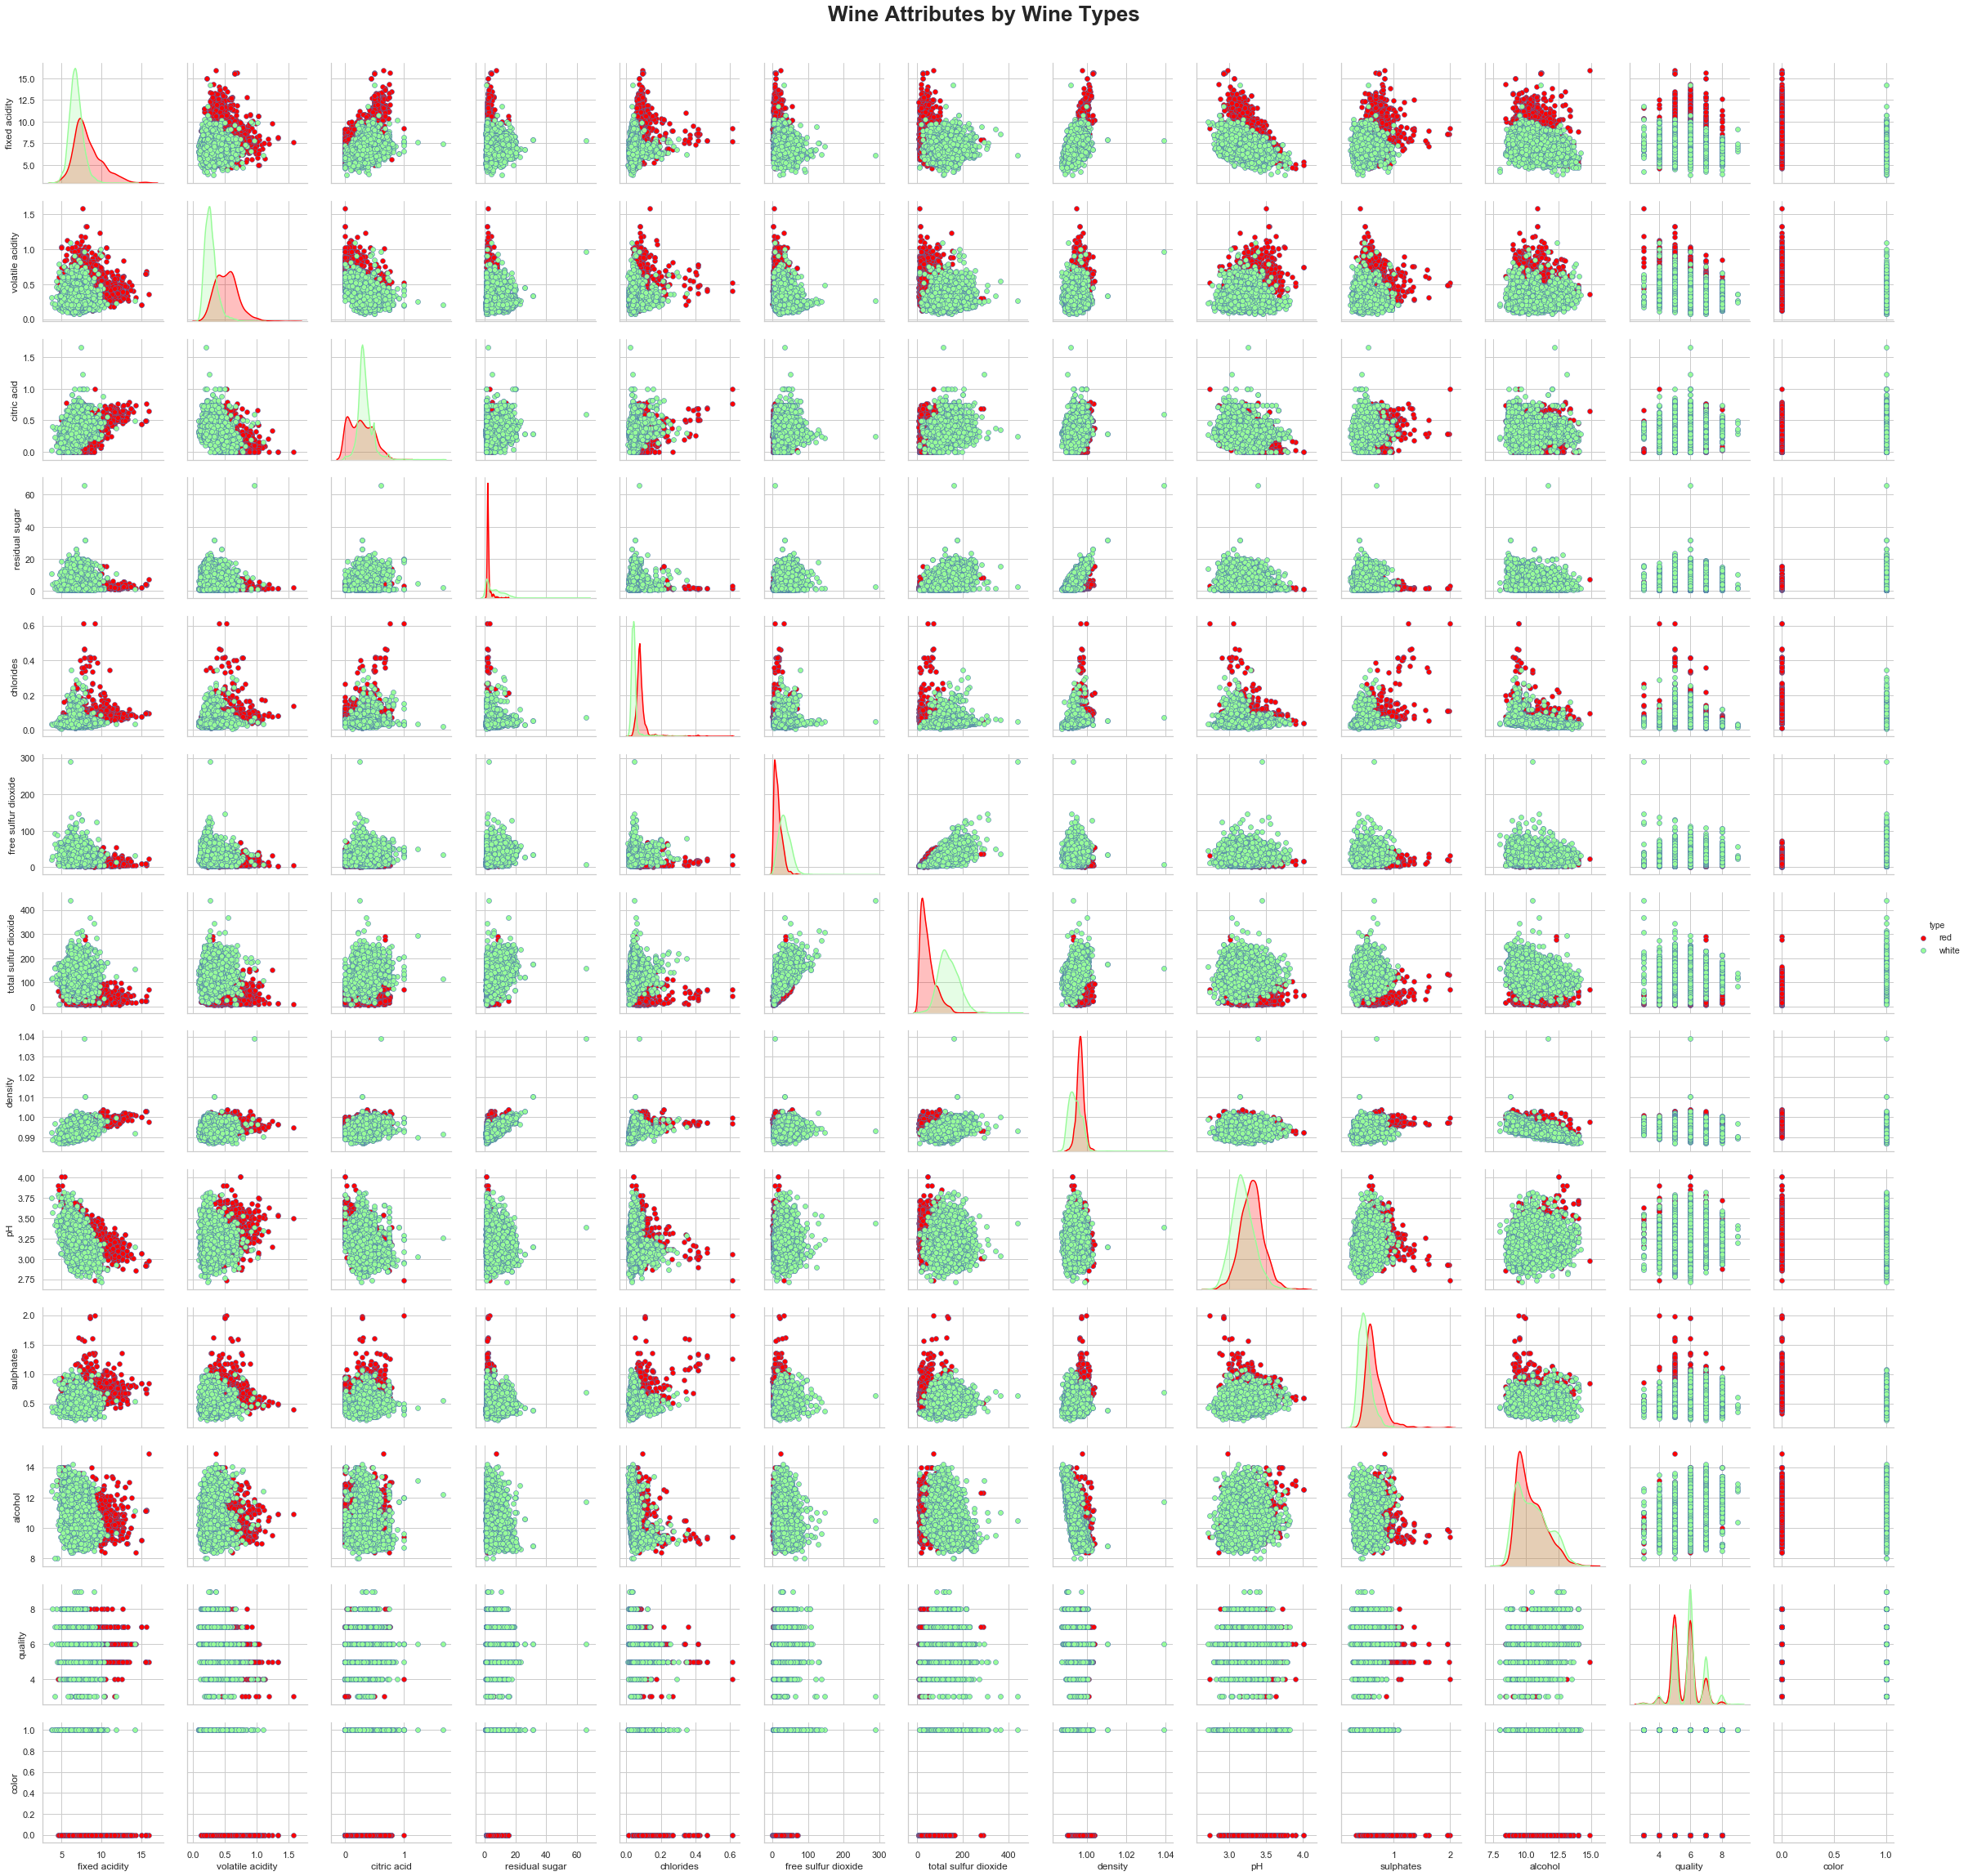

In [48]:
g = sns.pairplot(wines,
                 hue='type',
                 palette={'red' : 'red', 'white' : 'palegreen'},
                 plot_kws=dict(edgecolor='b', linewidth=0.5))

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Wine Attributes by Wine Types',
             fontsize=26,
             fontweight='bold')

# save the plot for easier analyzing out of notebook
g.savefig('./Figures/pairplot1.png')

Let's analyze correlations and the pairplot.

Most of correlations are week but there are some exceptions.

- **Total (0.70)** and **free (0.47)sulfur dioxides** have the highest correlation with white wines.
- **Free sulfur dioxide** is a part of **total sulfur dioxide** and thus they have the highest correlation (0.72). That represents a colinearity that could be a problem for some models and free sulfur dioxide might need to be dropped later.
- The **volatile acid** (-0.65) and **chlorides** (-0.51) have negative correlation with **color**. This indicates a tendency to red wines classification.
- The **residual sugar** has 0.50 relation with **total sulfur dioxide** and 0.40 with **free sulfur dioxide**. This is an indication that more sulfur dioxide is added to wines with higher sugar content to prevent secondary fermentation of remaining sugar. 
- **Density** has a relatively high negative corelation to **alcohol** (-0.69). This is confirmed by the decreasing linear trend from left to right. **Density** has also relatively high positive correlation to **residual sugar** (0.55), which is reinforced by two white wine outliners.
- **Sulphates**, **chlorides**, **fixed acidity** and **volatile acidity** in red wine seem to be higher than in white wine.
- **Residual sugar**, **total sulfur dioxide** and **citric acid** seem to be higher in white wines as compared to red wine.


Next we will check the correlation and pairplots from the perpective of wine quality.

**Checking correlations based on the quality of wines**

In [49]:
# sort features in order of their correllations with quality of wines (column "quality")
sort_corr_cols = wcorr.quality.sort_values(ascending=False).keys()
sort_corr_q = wcorr.loc[sort_corr_cols,sort_corr_cols]

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text yticklabel objects>)

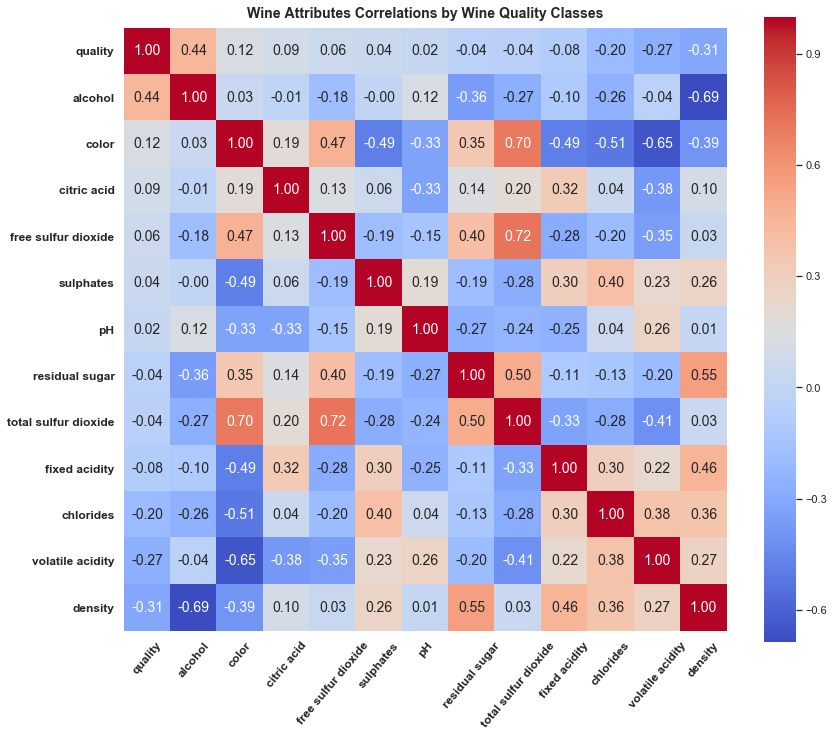

In [50]:
# heatmaps plot for correlations
plt.figure(figsize=(13.5,11.5))
sns.heatmap(sort_corr_q,
            annot=True,
            annot_kws=dict(fontsize=14),
            square=True,
            fmt='.2f',
            cmap='coolwarm')
plt.title('Wine Attributes Correlations by Wine Quality Classes',
          fontsize=14,
          fontweight='bold',
          pad=10)

plt.xticks(rotation=50,fontsize=12,fontweight='bold')
plt.yticks(fontsize=12,fontweight='bold')


In [51]:
# drop the "quality" column and add previously defined y_qclass
# for easier plotting
wines_pq = wines.drop('quality', axis=1)
wines_pq['q_class'] = y_qclass

In [52]:
wines_pq.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.36         0.32            1.80   
1  white            8.3              0.20         0.74            4.45   
2  white            7.2              0.16         0.32            0.80   
3    red            6.6              0.58         0.00            2.20   
4  white            6.2              0.35         0.31            2.60   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.067                  4.0                   8.0  0.99280  3.36   
1      0.044                 33.0                 130.0  0.99240  3.25   
2      0.040                 50.0                 121.0  0.99220  3.27   
3      0.100                 50.0                  63.0  0.99544  3.59   
4      0.036                 37.0                  92.0  0.98938  3.27   

   sulphates  alcohol quality class  color  q_class  
0       0.55     12.8        medium      0        1  
1       0.42     12.2        medium      1        1  
2       0.33     10.0        medium      1        1  
3       0.68     11.4        medium      0        1  
4       0.53     12.8        medium      1        1

**Plot pairplot for wine attributes by quality classes of wine**

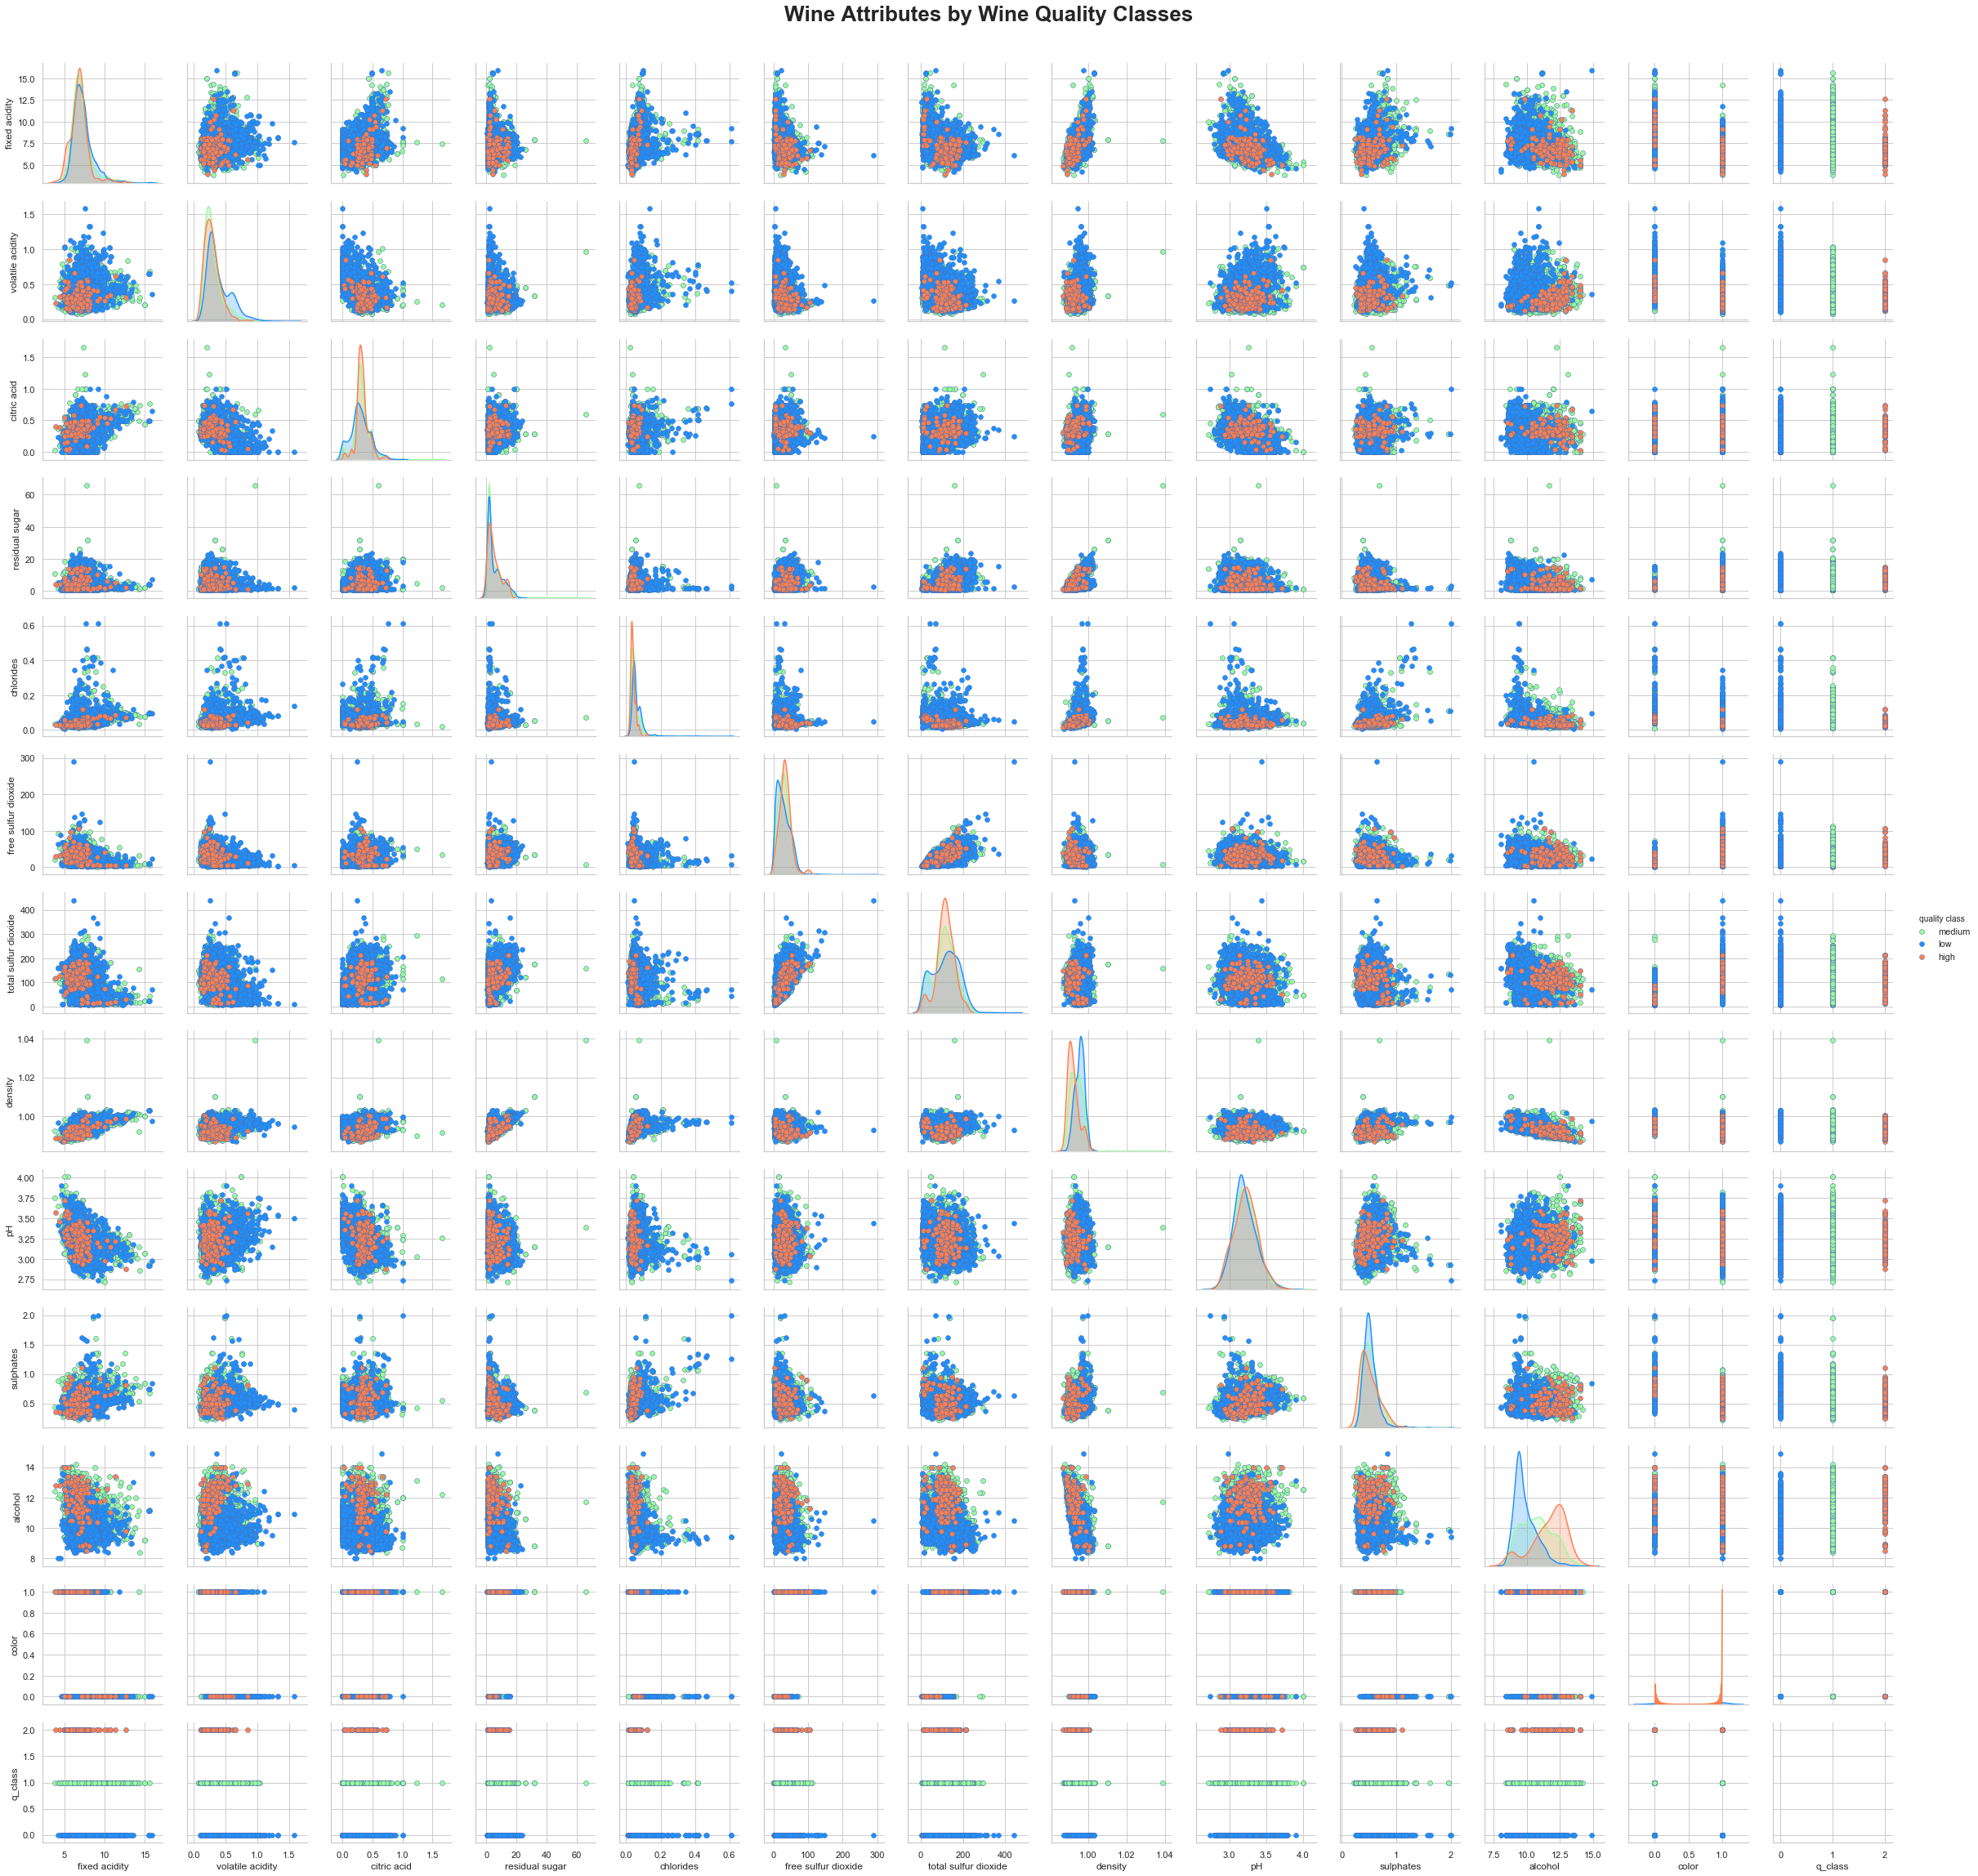

In [53]:
g = sns.pairplot(wines_pq,
                 hue='quality class',
                 palette={'high' : 'coral', 'medium' : 'palegreen', 'low' : 'dodgerblue'},
                 plot_kws=dict(edgecolor='b', linewidth=0.5))

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Wine Attributes by Wine Quality Classes',
             fontsize=26,
             fontweight='bold')

# save the plot for easier analyzing out of notebook
g.savefig('./Figures/pairplot2.png')


- The highest sulphate levels are found in the medium quality wines, and lower with high quality wines
- Lower levels of chloride and volatile acids are in wines with high quality ratings.

**Let's see the relation of wine quality vs all wine parameters by color of wine**


In [54]:
for f in wines.drop(['type','quality','quality class','color'],axis=1).columns:
    print(f)

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide
total sulfur dioxide
density
pH
sulphates
alcohol


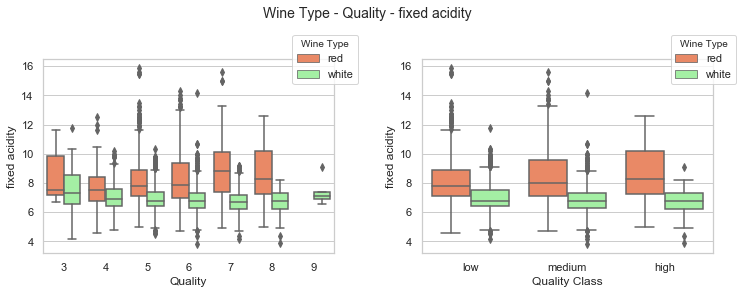

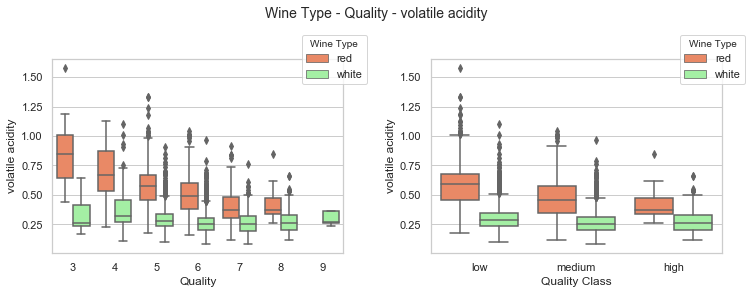

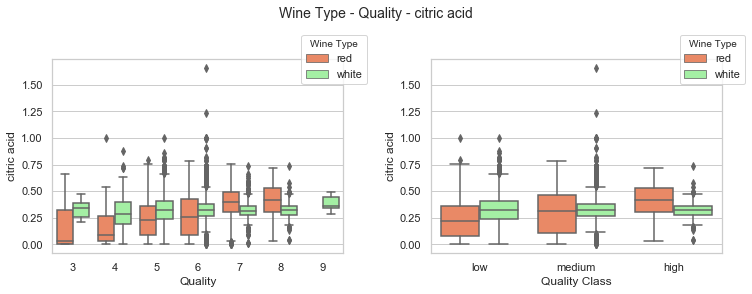

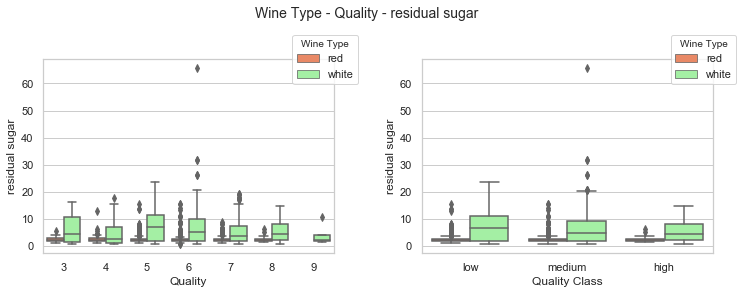

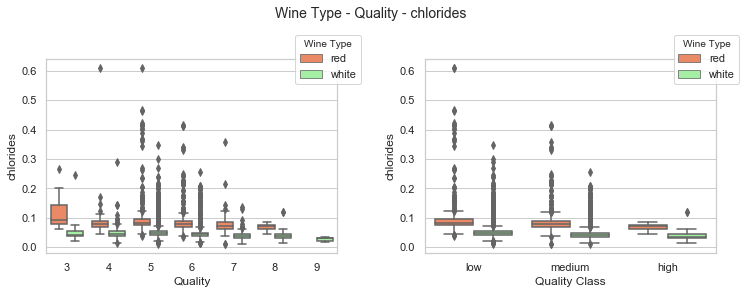

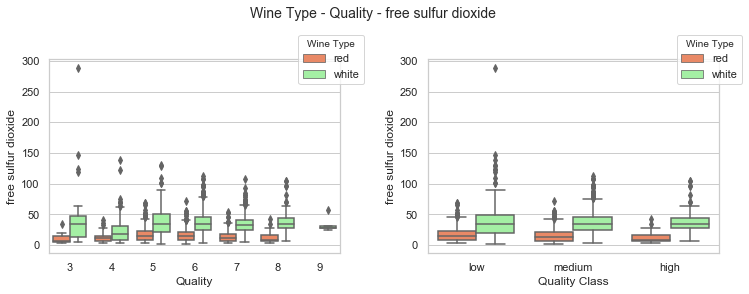

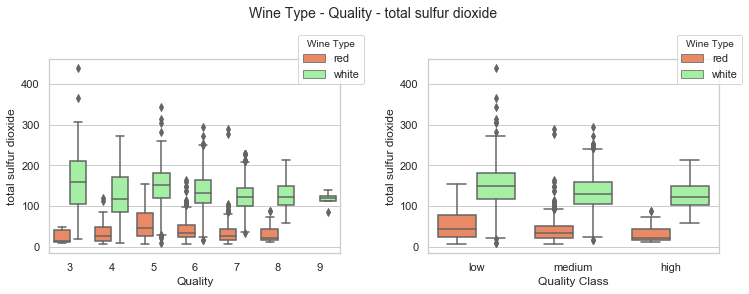

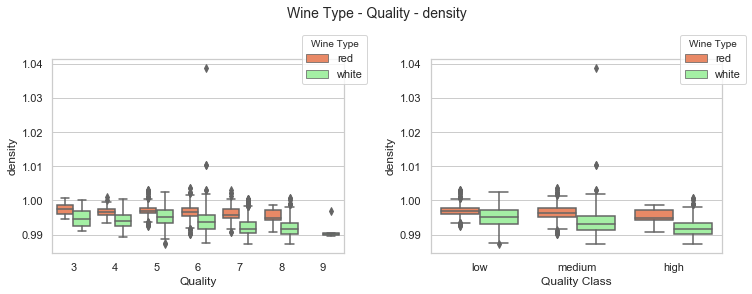

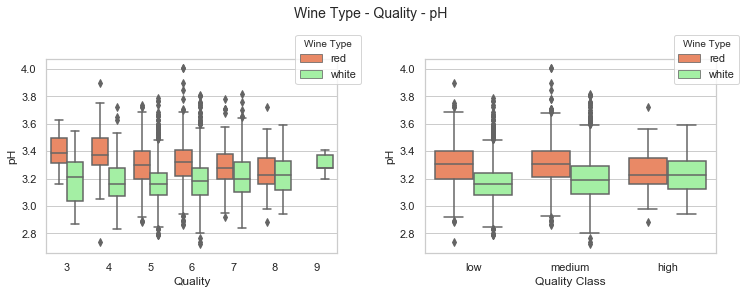

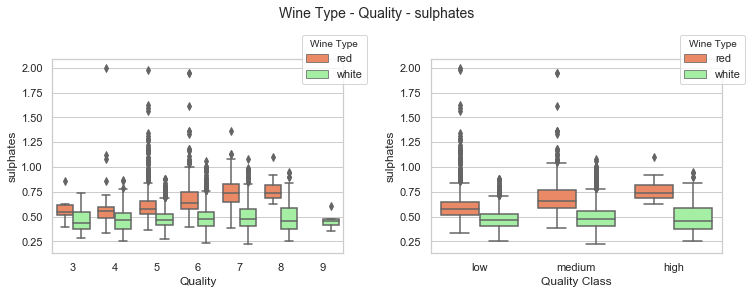

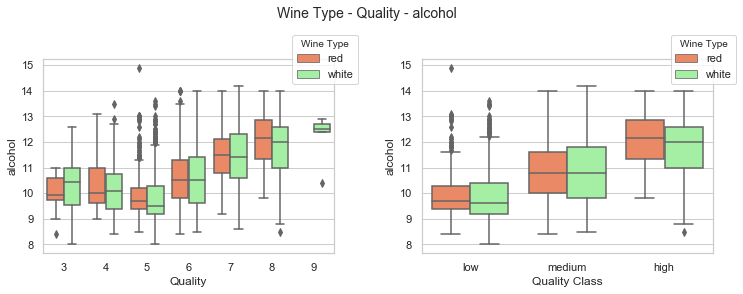

In [55]:
for attr in wines.drop(['type','quality','quality class','color'],axis=1).columns:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle('Wine Type - Quality - '+ attr, fontsize=14)
    f.subplots_adjust(top=0.80, wspace=0.3)

    sns.boxplot(x='quality',
                y=attr,
                hue='type',
                data=wines,
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax1)
    ax1.set_xlabel('Quality')
    ax1.set_ylabel(attr,size=12)
    ax1.legend(title='Wine Type',bbox_to_anchor=(1.1,1.15))
    
    sns.boxplot(x='quality class',
                y=attr,
                hue='type',
                data=wines,
                order=['low','medium','high'],
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax2)
    ax2.set_xlabel("Quality Class")
    ax2.set_ylabel(attr) 
    ax2.legend(loc=1,title='Wine Type',bbox_to_anchor=(1.1,1.15))

**Let's see the same using violin plots**

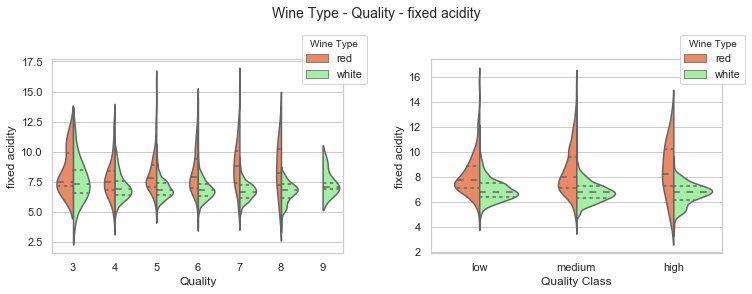

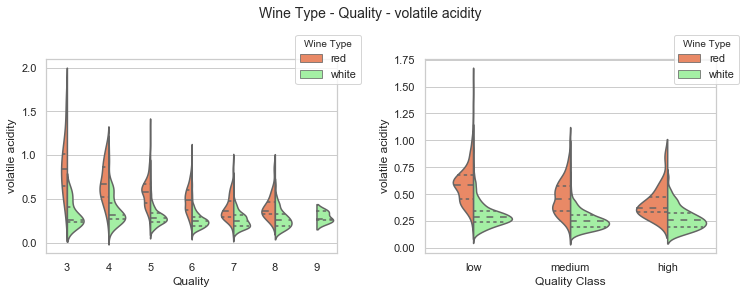

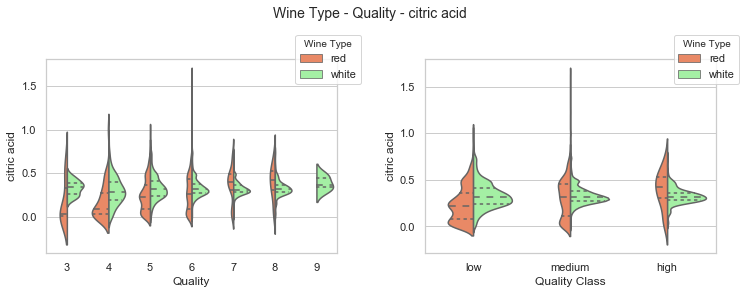

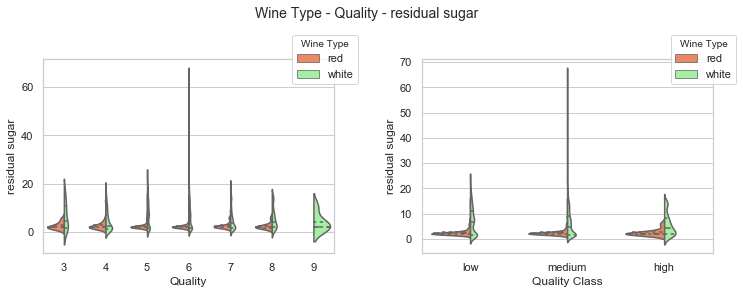

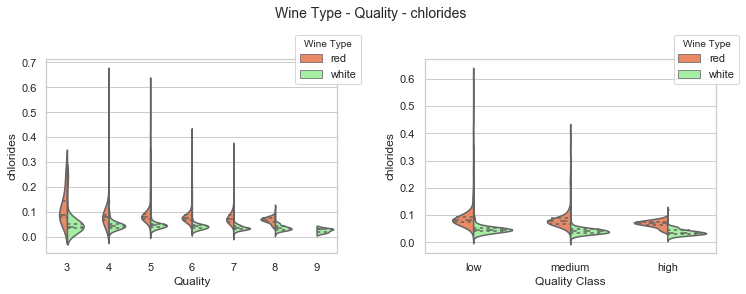

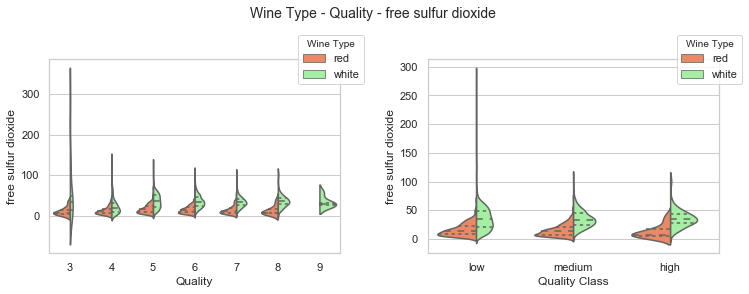

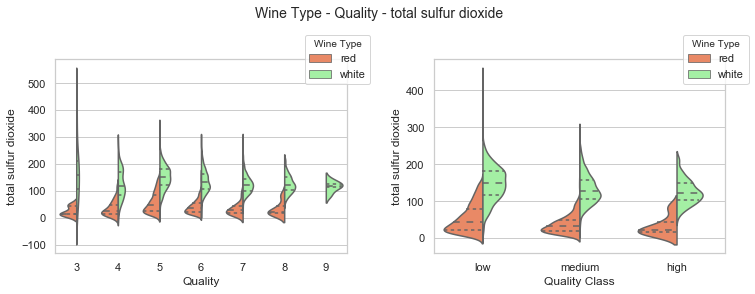

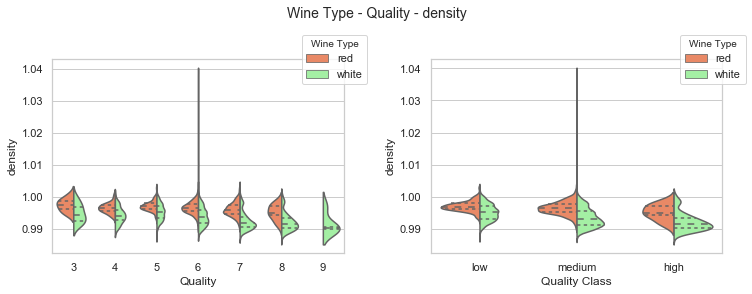

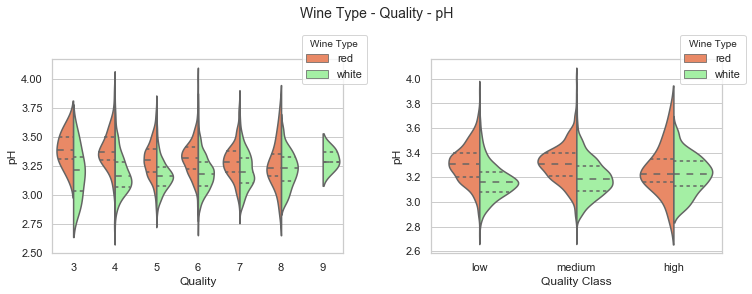

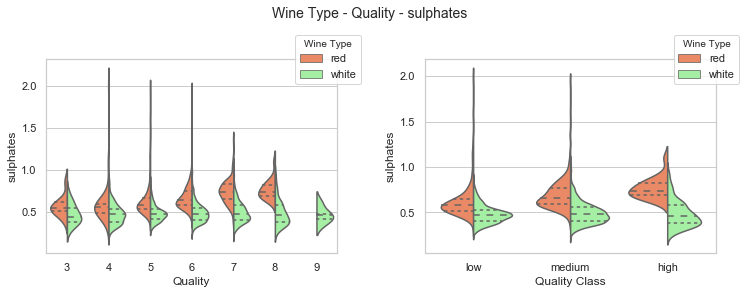

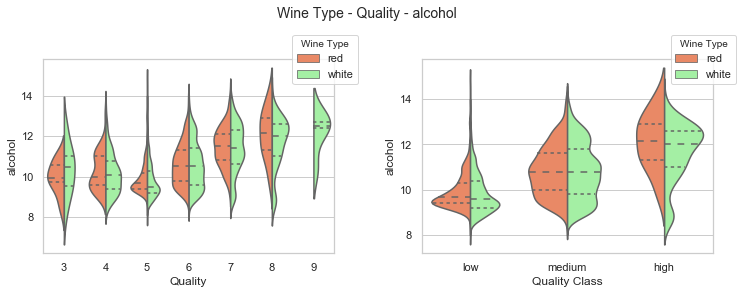

In [56]:
for attr in wines.drop(['type','quality','quality class','color'],axis=1).columns:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    f.suptitle('Wine Type - Quality - '+ attr, fontsize=14)
    f.subplots_adjust(top=0.80, wspace=0.3)

    sns.violinplot(x='quality',
                y=attr,
                hue='type',
                data=wines,
                split=True,
                inner='quart',
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax1)
    ax1.set_xlabel('Quality')
    ax1.set_ylabel(attr,size=12)
    ax1.legend(title='Wine Type',bbox_to_anchor=(1.1,1.15))
    
    sns.violinplot(x='quality class',
                y=attr,
                hue='type',
                data=wines,
                split=True,
                inner='quart',
                order=['low','medium','high'],
                palette={'red' : 'coral', 'white':'palegreen'},
                ax=ax2)
    ax2.set_xlabel("Quality Class")
    ax2.set_ylabel(attr) 
    ax2.legend(loc=1,title='Wine Type',bbox_to_anchor=(1.1,1.15))

**lmplot for density vs. alcohol by wine type and quality classes**

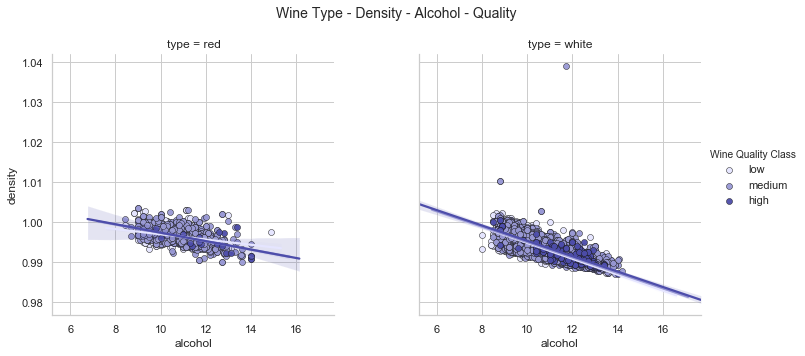

In [57]:
g = sns.lmplot(x='alcohol',
               y='density',
               col='type',
               col_order=['red','white'],
               hue='quality class',
               hue_order=['low','medium','high'],
               data=wines,
               palette=sns.light_palette('navy', 4),
               scatter_kws=dict(alpha=0.95,edgecolor="k", linewidth=0.5),
               fit_reg=True,
               legend=False)
fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Density - Alcohol - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')        

- This plot confirms correlations results: density has a relatively high negative correlation to alcohol (linear trend is decreasing from left to right). 



**lmplot for total sulfur dioxide vs. residual sugar by wine type and quality classes**

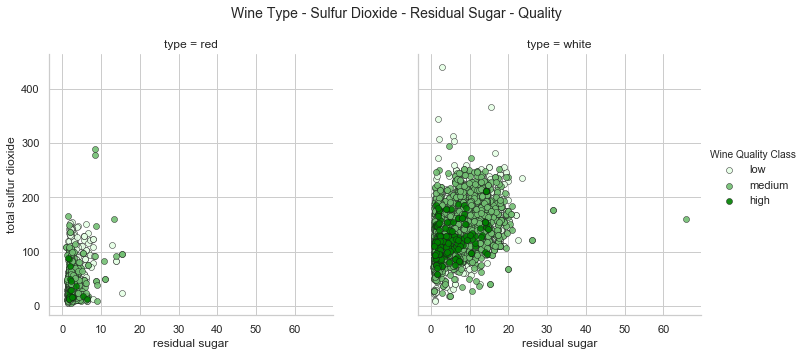

In [58]:
g = sns.lmplot(x='residual sugar',
               y='total sulfur dioxide',
               col='type',
               col_order=['red','white'],
               hue='quality class',
               hue_order=['low','medium','high'],
               data=wines,
               palette=sns.light_palette('green', 3),
               scatter_kws=dict(alpha=0.9,edgecolor="k", linewidth=0.5),
               fit_reg=False,
               legend=False)
fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar - Quality', fontsize=14)
g.add_legend(title='Wine Quality Class')        

**lmplot for total sulfur dioxide vs. residual sugar by wine type**

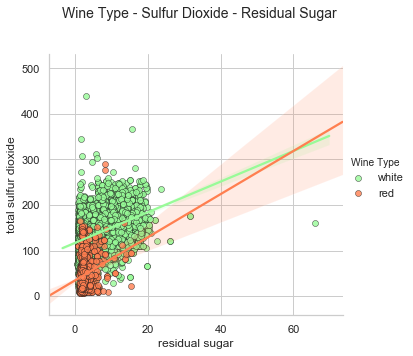

In [59]:
g = sns.lmplot(x='residual sugar',
               y='total sulfur dioxide',
               hue='type',
               hue_order=['white','red'],
               data=wines,
               palette = {'red': 'coral', 'white':'palegreen'},
               scatter_kws=dict(alpha=0.8,edgecolor="k", linewidth=0.5),
               fit_reg=True,
               legend=False)
fig = g.fig 
fig.subplots_adjust(top=0.85, wspace=0.3)
fig.suptitle('Wine Type - Sulfur Dioxide - Residual Sugar', fontsize=14)
g.add_legend(title='Wine Type')        

- The plot confirms previously stated results: total sulfur dioxide and residual sugar content seems to be much higher in white wines than in red wines 
- The residual sugar has 0.50 corelation with total sulfur dioxide. This is an indication that more sulfur dioxide is added to wines with higher sugar


## Predicting Wine Type (Red or White)

**Let's check our dataframe again:**

In [60]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.36         0.32            1.80   
1  white            8.3              0.20         0.74            4.45   
2  white            7.2              0.16         0.32            0.80   
3    red            6.6              0.58         0.00            2.20   
4  white            6.2              0.35         0.31            2.60   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.067                  4.0                   8.0  0.99280  3.36   
1      0.044                 33.0                 130.0  0.99240  3.25   
2      0.040                 50.0                 121.0  0.99220  3.27   
3      0.100                 50.0                  63.0  0.99544  3.59   
4      0.036                 37.0                  92.0  0.98938  3.27   

   sulphates  alcohol  quality quality class  color  
0       0.55     12.8        7        medium      0  
1       0.42     12.2        6        medium      1  
2       0.33     10.0        6        medium      1  
3       0.68     11.4        6        medium      0  
4       0.53     12.8        7        medium      1

#### Extract Features and Target

In [61]:
features = wines.drop(['type','quality','quality class','color'], axis=1).columns
X = wines[features].copy()

In [62]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.36         0.32            1.80      0.067   
1            8.3              0.20         0.74            4.45      0.044   
2            7.2              0.16         0.32            0.80      0.040   
3            6.6              0.58         0.00            2.20      0.100   
4            6.2              0.35         0.31            2.60      0.036   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  4.0                   8.0  0.99280  3.36       0.55   
1                 33.0                 130.0  0.99240  3.25       0.42   
2                 50.0                 121.0  0.99220  3.27       0.33   
3                 50.0                  63.0  0.99544  3.59       0.68   
4                 37.0                  92.0  0.98938  3.27       0.53   

   alcohol  
0     12.8  
1     12.2  
2     10.0  
3     11.4  
4     12.8

We will use the column "color" for our target (numerical values)

In [63]:
y = wines.color.copy()

In [64]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: color, dtype: int32

In [65]:
wines.groupby('color').color.count()

color
0    1599
1    4898
Name: color, dtype: int64

**Data distribution by wine type**

Text(0.5, 1.0, 'Wine Sample Distribution by Type')

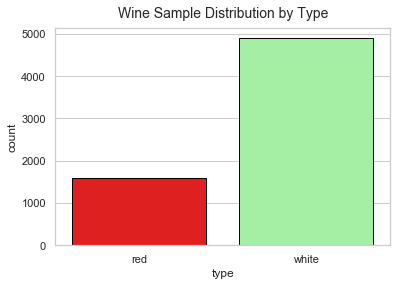

In [66]:
#wine distribution based on type
sns.countplot(x='type',
              data=wines,
              edgecolor='black',
              palette={'red':'red','white':'palegreen'})

plt.title('Wine Sample Distribution by Type',
          fontsize=14,
          pad=10)

- The number of red wine samples is about 1/3 of the number of white wine samples.
- It is still pretty big number and it should be good enough for our prediction.


### Logistic Regression

Since this is a binary classification task we will start with logistic regression.
<br>
We will do cross-validation, standardization and hyperparamters tuning.

**Split dataset into training and test sets**

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

**Declare a modeling pipeline with standard scaler**

In [68]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('lr',LogisticRegression(random_state=77))
])

**Declare hyperparameters to tune**

In [69]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'lr': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'lr__C': 1.0, 'lr__class_weight': None, 'lr__dual': False, 'lr__fit_intercept': True, 'lr__intercept_scaling': 1, 'lr__max_iter': 100, 'lr__multi_class': 'warn', 'lr__n_jobs': None, 'lr__penalty': 'l2', 'lr__random_state': 77, 'lr__so

In [70]:
# Declare parameters to tune
param_grid = {
    'lr__C': [0.1,1, 10, 100],
    'lr__tol': [0.001,0.0001]
}

**Sklearn cross-validation with pipeline**

In [71]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [72]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'lr__C': [0.1, 1, 10, 100], 'lr__tol': [0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [73]:
# list the best set of parametars found by using CV
clf.best_params_

{'lr__C': 1, 'lr__tol': 0.001}

In [74]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=77, solver='warn',
          tol=0.001, verbose=0, warm_start=False))])

#### Predictions and Evaluations

In [75]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [76]:
# evaluate performance of the classifier
target_names = ['red','white']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       480
       white       1.00      1.00      1.00      1470

   micro avg       0.99      0.99      0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950
 

[[ 476    4]
 [   6 1464]]


**Plot heatmaps of confusion matrix: without and with normalization**

Text(341.35217391304354, 0.5, 'True Label')

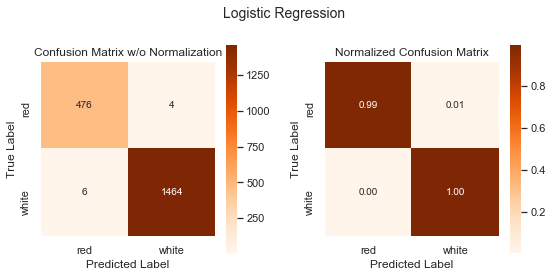

In [77]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
f.suptitle('Logistic Regression', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['red','white'])
ax1.set_yticklabels(labels=['red','white'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['red','white'])
ax2.set_yticklabels(labels=['red','white'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')


In [78]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.9948717948717949

- As you can see, we got wonderful with 99.48 % accuracy.
This result is really sufficient and obtained through a very simple model.
- This is also confirmed with the normalized confusion matrix above (diagonal values are 1 or close to 1)


## Predicting Quality Class of Wine (low, medium, high)

Let's prepare the dataset for modeling a wine quality classifiers. We need to focus on wine quality class feature.

**Let's check our dataframe again:**

In [79]:
wines.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0    red            6.8              0.36         0.32            1.80   
1  white            8.3              0.20         0.74            4.45   
2  white            7.2              0.16         0.32            0.80   
3    red            6.6              0.58         0.00            2.20   
4  white            6.2              0.35         0.31            2.60   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.067                  4.0                   8.0  0.99280  3.36   
1      0.044                 33.0                 130.0  0.99240  3.25   
2      0.040                 50.0                 121.0  0.99220  3.27   
3      0.100                 50.0                  63.0  0.99544  3.59   
4      0.036                 37.0                  92.0  0.98938  3.27   

   sulphates  alcohol  quality quality class  color  
0       0.55     12.8        7        medium      0  
1       0.42     12.2        6        medium      1  
2       0.33     10.0        6        medium      1  
3       0.68     11.4        6        medium      0  
4       0.53     12.8        7        medium      1

**Extract Features and Target**

In [80]:
features = wines.drop(['type','quality','quality class','color'], axis=1).columns
X = wines[features].copy()

In [81]:
X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.8              0.36         0.32            1.80      0.067   
1            8.3              0.20         0.74            4.45      0.044   
2            7.2              0.16         0.32            0.80      0.040   
3            6.6              0.58         0.00            2.20      0.100   
4            6.2              0.35         0.31            2.60      0.036   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  4.0                   8.0  0.99280  3.36       0.55   
1                 33.0                 130.0  0.99240  3.25       0.42   
2                 50.0                 121.0  0.99220  3.27       0.33   
3                 50.0                  63.0  0.99544  3.59       0.68   
4                 37.0                  92.0  0.98938  3.27       0.53   

   alcohol  
0     12.8  
1     12.2  
2     10.0  
3     11.4  
4     12.8

In [82]:
# earlier we prepared numerical target variable "y_class". Let's use it now
y = y_qclass

In [83]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: quality class, dtype: int64

In [84]:
y.value_counts()

1    3915
0    2384
2     198
Name: quality class, dtype: int64

**Data Distribution by quality class of wine**

Text(0.5, 1.0, 'Wine Sample Distribution by Quality Class')

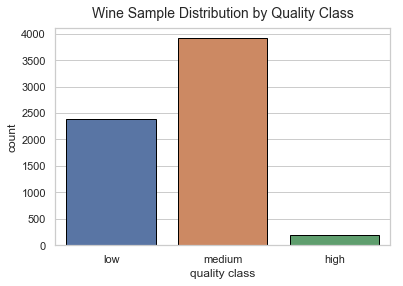

In [85]:
# wine distribution based on quality class
# low:0-5; medium:6-7; high:8-9
sns.countplot(x='quality class',
              data=wines,
              edgecolor='black',
              order=['low','medium','high'])

plt.title('Wine Sample Distribution by Quality Class',
          fontsize=14,
          pad=10)

- We grouped wine quality scores into three qualitative buckets as it is shown above. 
- The distribution data by wine quality classes is confirming the imbalance between classes.
- The number of samples in high quality class is pretty small and we could expect that could cause problems to our models.


In our predictions we will use three classifiers: Decision Tree, Random Forest and Support Vector Machine.    

### 1. Decision Tree Classifier

First we will build a model using a decision tree.

**Split dataset into training and test sets**

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

**Declare a modeling pipeline with standard scaler**

In [87]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('dtree',DecisionTreeClassifier(random_state=77))
])

**Declare hyperparameters to tune**

In [88]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'dtree': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'dtree__class_weight': None, 'dtree__criterion': 'gini',

In [89]:
# Declare parameters to tune
param_grid = {
    'dtree__min_samples_leaf': [2, 3, 4, 6],
    'dtree__max_depth': [8, 9, 10, 12, 13],
    'dtree__criterion': ['gini','entropy'],
    'dtree__class_weight': ['balanced', None]
}

**Sklearn cross-validation with pipeline**

In [90]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [91]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'dtree__min_samples_leaf': [2, 3, 4, 6], 'dtree__max_depth': [8, 9, 10, 12, 13], 'dtree__criterion': ['gini', 'entropy'], 'dtree__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
# list the best set of parametars found by using CV
clf.best_params_

{'dtree__class_weight': None,
 'dtree__criterion': 'gini',
 'dtree__max_depth': 12,
 'dtree__min_samples_leaf': 2}

In [93]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=77,
            splitter='best'))])

#### Predictions and Evaluations

In [94]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [95]:
# evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         low       0.67      0.66      0.66       716
      medium       0.76      0.79      0.78      1175
        high       0.28      0.12      0.17        59

   micro avg       0.72      0.72      0.72      1950
   macro avg       0.57      0.52      0.54      1950
weighted avg       0.71      0.72      0.72      1950
 

[[471 244   1]
 [227 931  17]
 [  3  49   7]]


In [96]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7225641025641025

- Not as good results as for the wine type classification. From the class based statistics we can see that the recall for high quality wines is pretty bad. A lot of them have been misplaced into low and medium ratings. 
- This was expected since there are not a lot of training samples for high quality wines.


**Plot heatmaps of confusion matrix: without and with normalization**

Text(487.0739130434785, 0.5, 'True Label')

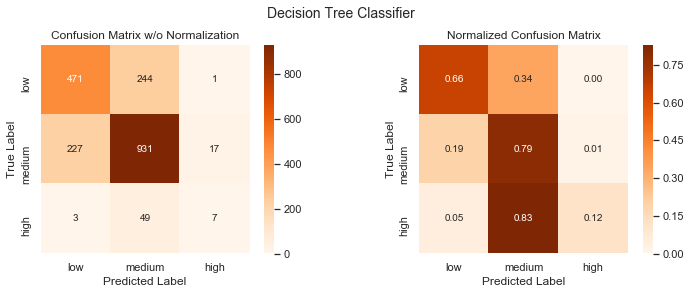

In [97]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Decision Tree Classifier', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')


- The diagonal elements in the confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 
- The higher the diagonal values of the confusion matrix the better, indicating many correct predictions
- Due to heavy class imbalance, we had to perform normalization by class support size to have a more visual interpretation of which class is being misclassified.
- In our case it is obvious that lack of high quality wine samples caused their misplacement mostly into medium class.


In [98]:
# save for later
matn_dtc = matn

### 2. Random Forest Classifier

Let's try now to build a model using a random forest.

**Split dataset into training and test sets**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

**Declare a modeling pipeline with standard scaler**

In [100]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('rfc',RandomForestClassifier(random_state=77))
])

**Declare hyperparameters to tune**

In [101]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'rfc': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=Fa

In [102]:
# Declare parameters to tune
param_grid = {
   # 'rfc__min_samples_leaf': [1, 2, 3],
    'rfc__min_samples_split': [2, 3, 4],
    'rfc__n_estimators': [150, 175, 200 ],
    'rfc__max_depth': [20, 40, None],
    'rfc__criterion': ['gini','entropy'],
    'rfc__class_weight': ['balanced', None]
}

**Sklearn cross-validation with pipeline**

In [103]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [104]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...s='warn', n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'rfc__min_samples_split': [2, 3, 4], 'rfc__n_estimators': [150, 175, 200], 'rfc__max_depth': [20, 40, None], 'rfc__criterion': ['gini', 'entropy'], 'rfc__class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
# list the best set of parametars found by using CV
clf.best_params_

{'rfc__class_weight': None,
 'rfc__criterion': 'gini',
 'rfc__max_depth': 40,
 'rfc__min_samples_split': 3,
 'rfc__n_estimators': 175}

In [106]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=175, n_jobs=None,
            oob_score=False, random_state=77, verbose=0, warm_start=False))])

#### Predictions and Evaluations

In [107]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [108]:
# # evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         low       0.80      0.73      0.76       716
      medium       0.82      0.88      0.85      1175
        high       0.83      0.34      0.48        59

   micro avg       0.81      0.81      0.81      1950
   macro avg       0.82      0.65      0.70      1950
weighted avg       0.81      0.81      0.81      1950
 

[[ 523  193    0]
 [ 132 1039    4]
 [   1   38   20]]


In [109]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.8112820512820513


- This model prediction resuls are quite good with an improvement in accuracy of of about 9% from the decision tree model. 
- Also there is no low quality wine sample has been misclassified as high, and only one high quality wine sample has been misclassified as low.
- We can see a considerable overlap between medium and high/low quality wine samples. Given the nature of the data and class distribution, that is expected.


**Plot heatmaps of confusion matrix: without and with normalization**

Text(487.0739130434785, 0.5, 'True Label')

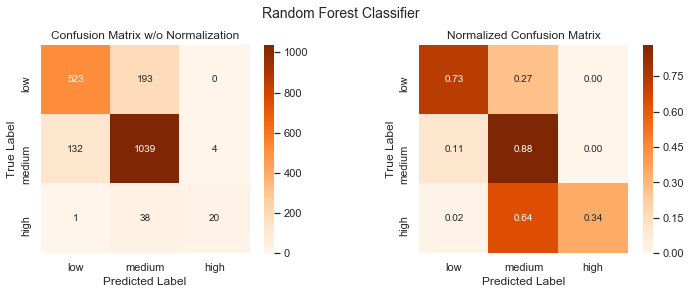

In [110]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Random Forest Classifier', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')


- In the perfect scenario diagonal elements in our normalized confusion matrix will be the darkest (~1) while the off-diagonal elements will be the brightest (~0)
- We can see visual improvements comparing to the decision tree model 


In [111]:
# save for later
matn_rfc = matn

### 3. Support Vector Machine Classifier

Let's see what we can get with the SVM classifier.

**Split dataset into training and test sets**

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=77,stratify=y)

**Declare a modeling pipeline with standard scaler**

In [113]:
# Create a modeling pipeline with the standard scaler and a model
pipeline = Pipeline([
    ('scl',StandardScaler()),
    ('svc',SVC(random_state=77))
])

**Declare hyperparameters to tune**

In [114]:
# List tunable parameters
print(pipeline.get_params())

{'memory': None, 'steps': [('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=77,
  shrinking=True, tol=0.001, verbose=False))], 'scl': StandardScaler(copy=True, with_mean=True, with_std=True), 'svc': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=77,
  shrinking=True, tol=0.001, verbose=False), 'scl__copy': True, 'scl__with_mean': True, 'scl__with_std': True, 'svc__C': 1.0, 'svc__cache_size': 200, 'svc__class_weight': None, 'svc__coef0': 0.0, 'svc__decision_function_shape': 'ovr', 'svc__degree': 3, 'svc__gamma': 'auto_deprecated', 'svc__kernel': 'rbf', 'svc__max_iter': -1, 'svc__probability': False, 'svc__random_state': 77, 'svc__shrinking': 

In [115]:
param_grid = {
    'svc__C': [0.08, 0.1, 1, 10],
    'svc__gamma': [5, 1, 0.1, 0.01]
}

**Sklearn cross-validation with pipeline**

In [116]:
clf = GridSearchCV(pipeline, param_grid, cv=10)

In [117]:
# Fit and tune the model
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=77,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [0.08, 0.1, 1, 10], 'svc__gamma': [5, 1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [118]:
# list the best set of parametars found by using CV
clf.best_params_

{'svc__C': 1, 'svc__gamma': 1}

In [119]:
clf.best_estimator_

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=77, shrinking=True,
  tol=0.001, verbose=False))])

#### Predictions and Evaluations

In [120]:
# predict a new set of data
y_pred = clf.predict(X_test)

In [121]:
# evaluate performance of the classifier
target_names = ['low','medium','high']
print(classification_report(y_test,y_pred,target_names=target_names),'\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         low       0.76      0.59      0.66       716
      medium       0.75      0.88      0.81      1175
        high       0.78      0.12      0.21        59

   micro avg       0.75      0.75      0.75      1950
   macro avg       0.76      0.53      0.56      1950
weighted avg       0.75      0.75      0.74      1950
 

[[ 423  293    0]
 [ 135 1038    2]
 [   1   51    7]]


In [122]:
# measure accuracy of the classifier
accuracy_score(y_true = y_test, y_pred = y_pred)

0.7528205128205128


- This model behaves almost the same as Random Forest Classifier for the medium quality samples.
- It fails for low quality wines and especially for high quality wines. Recall for high quality wines is very bad, the same as for Decision Tree Classifier. 
- It looks that results in this model depends more on the number of samples than for the other 2 models.


**Plot heatmaps of confusion matrix: without and with normalization**

Text(487.0739130434785, 0.5, 'True Label')

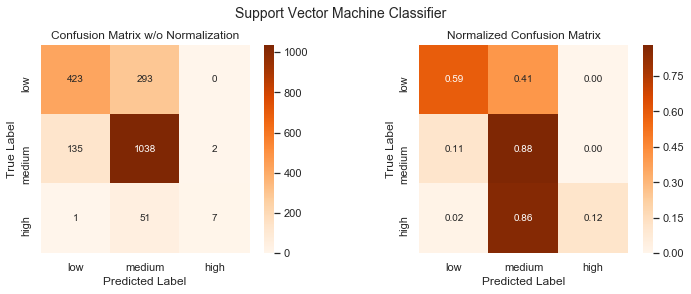

In [123]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
f.suptitle('Support Vector Machine Classifier', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# confusion matrix without normalization
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,
            annot=True,
            fmt='d',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Confusion Matrix w/o Normalization')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix 
matn = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
sns.heatmap(matn,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Normalized Confusion Matrix')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')


- The very dark off-diagonal element and bright diagonal element for high quality wines in the normalized matrix, represent a failure of this model. 
- We can notice visually the similar behavior for low quality wines.
- The accuracy score places this model between Decision Tree Classifier, but worse than Random Forest Classifier.


In [124]:
# save for later
matn_svc = matn

**Let's compare normalized confusion matrices for all 3 classifiers:**

Text(666.7, 0.5, 'True Label')

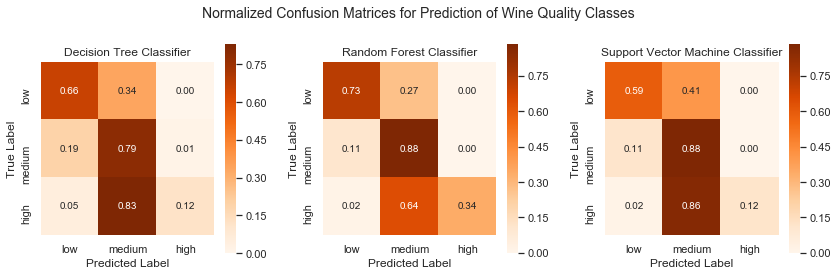

In [125]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
f.suptitle('Normalized Confusion Matrices for Prediction of Wine Quality Classes', fontsize=14)
f.subplots_adjust(top=0.85, wspace=0.3)

# normalized confusion matrix for decision tree classifier
sns.heatmap(matn_dtc,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax1)

ax1.set_xticklabels(labels=['low','medium','high'])
ax1.set_yticklabels(labels=['low','medium','high'])
ax1.set_title('Decision Tree Classifier')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

# normalized confusion matrix for random forest classifier
sns.heatmap(matn_rfc,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax2)
 
ax2.set_xticklabels(labels=['low','medium','high'])
ax2.set_yticklabels(labels=['low','medium','high'])
ax2.set_title('Random Forest Classifier')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

# normalized confusion matrix for support vector machine classifier
sns.heatmap(matn_svc,
            annot=True,
            fmt='.2f',
            cbar=True,
            square=True,
            cmap='Oranges',
            ax=ax3)
 
ax3.set_xticklabels(labels=['low','medium','high'])
ax3.set_yticklabels(labels=['low','medium','high'])
ax3.set_title('Support Vector Machine Classifier')
ax3.set_xlabel('Predicted Label')
ax3.set_ylabel('True Label')


- From the normalized confusion matrices above, we can easily see which model performs better
- The diagonal elements for Random Forest Classifier are darker and off-diagonal elements brighter than for the other two models
- Due to better performance for medium quality wines, Support Vector Machine Classifier slightly outperforms Decision Tree Classifier
